# <center> Tree Models </center>

### Decision Tree basics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_df = sns.load_dataset('iris')

In [4]:
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

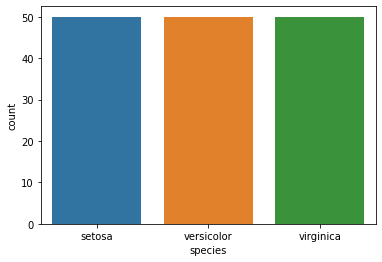

In [6]:
sns.countplot(data=iris_df, x='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

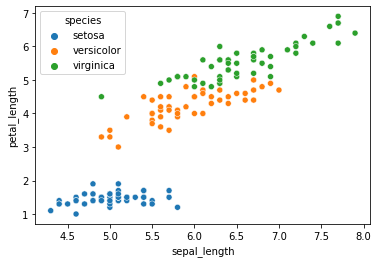

In [7]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'petal_length',
               hue= 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

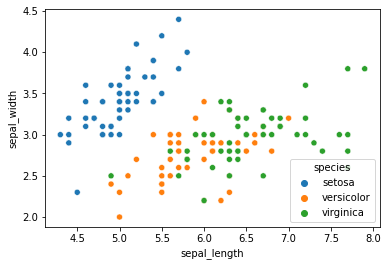

In [9]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'sepal_width',
               hue= 'species')

In [10]:
#biến đổi cột species thành dạng số
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # create map dictionary
iris_df.species = le.transform(iris_df.species) #map data
iris_df.species.unique()
#cách biến đổi giống hàm .map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

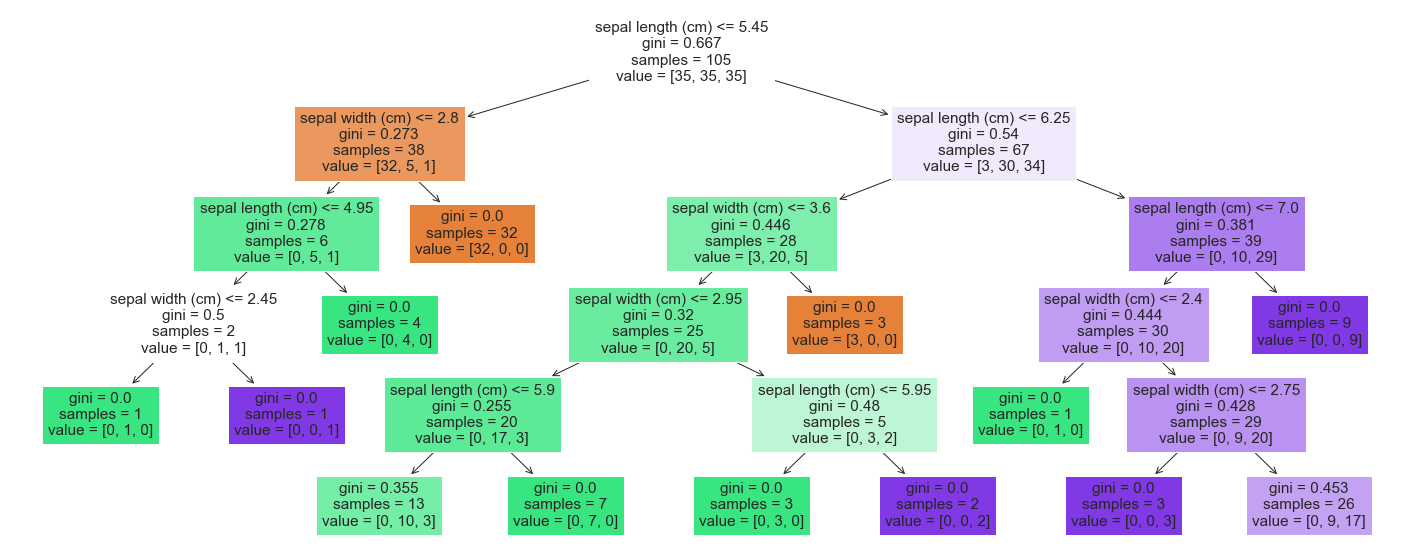

In [47]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)